### load modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
import os
%run EEG_auxiliary_module_sptm_wICA.ipynb

# resize output window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))



In [3]:
print(sklearn.__version__)

0.20.0


### create plotting functions 

In [4]:
def temp_gen_of_max_accuracy_window(subj,cond,ctype,if_plt = 1):
    timesTrain = (0,1) # where to look for max accuracy

    if ctype == 'multi':
        vmin = .2
        vmax = .3
        avgaxis = 0
    elif ctype == 'binary':
        vmin = .5
        vmax = .6
        avgaxis = (0,1)

    times = (-.2,2)    # what times to test accuracy based on max training
    savefolder = os.path.join('Results',subj,'Temporal Generalization')
    savefile = os.path.join(savefolder,'scores'+cond+'_'+ctype+'.npy')
    scores = np.load(savefile)

    scoresMean = np.nanmean(scores, axis=avgaxis)
    timeAll = np.linspace(-.2,2,scoresMean.shape[0])
    # find time to look for max accuray
    tidx1 = find_nearest_idx(timeAll,timesTrain[0])
    tidx2 = find_nearest_idx(timeAll,timesTrain[1])
    # tidEnd = find_nearest_idx(timeAll,2)
    timeMax = np.linspace(timesTrain[0],timesTrain[1],len(range(tidx1,tidx2)))
    timeTest = np.linspace(timesTrain[0],2,len(timeAll[tidx1:]))
    # np.diagonal(scoresMean)[tidx1:tidx2]
    
        #find max in this segment
    maxidx = np.diag(scoresMean)[tidx1:tidx2].argmax()
    acc = np.mean(scoresMean[tidx1+maxidx-1:tidx1+maxidx+1,tidx1:],axis=0)
    timeRest = np.linspace(timesTrain[0],2,len(acc))
    if if_plt:
    # # Plot the diagonal (it's exactly the same as the time-by-time decoding above)
        fig, (ax1,ax2) = plt.subplots(2,1)
        ax1.plot(timeTest, np.diag(scoresMean)[tidx1:], label='score')
        ax1.axhline(.5, color='k', linestyle='--', label='chance')
        ax1.set_xlabel('Times')
        ax1.set_ylabel('Accuracy')
        ax1.legend(loc = 'upper right')
        ax1.axvline(.0, color='k', linestyle='-')
        ax1.set_title(cond + ' Decoding over time '+ subj)
        # savefig = os.path.join(savefolder,'accpertime'+cond+'_binary.png')
        # plt.savefig(savefig)



        # fig, ax = plt.subplots()
        # plt.subplot(2,1,2)
        ax2.plot(timeRest, acc, label='score')
        ax2.axhline(.5, color='k', linestyle='--', label='chance')
        ax2.set_xlabel('Times')
        ax2.set_ylabel('test accuracy')
        ax2.legend(loc = 'upper right')
        ax2.axvline(.0, color='k', linestyle='-')
        ax2.set_title('Max decoding generalization over time '+ subj)

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=.3)
        
        fig.set_figheight(10)
        fig.set_figwidth(15)

        savefile = os.path.join(savefolder,'maxGeneralization'+cond+'_'+ctype)
        plt.savefig(savefile)
    test_acc = acc
    return test_acc,timeRest


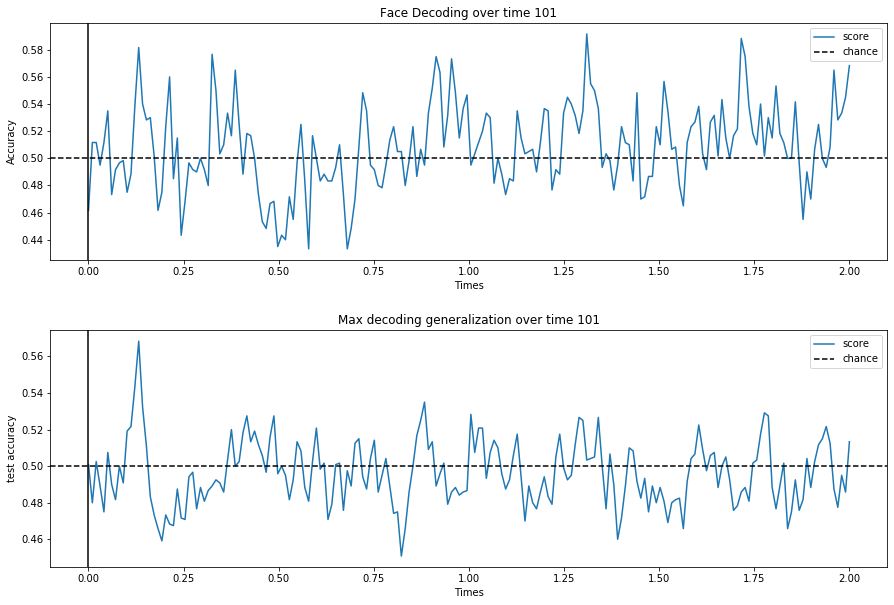

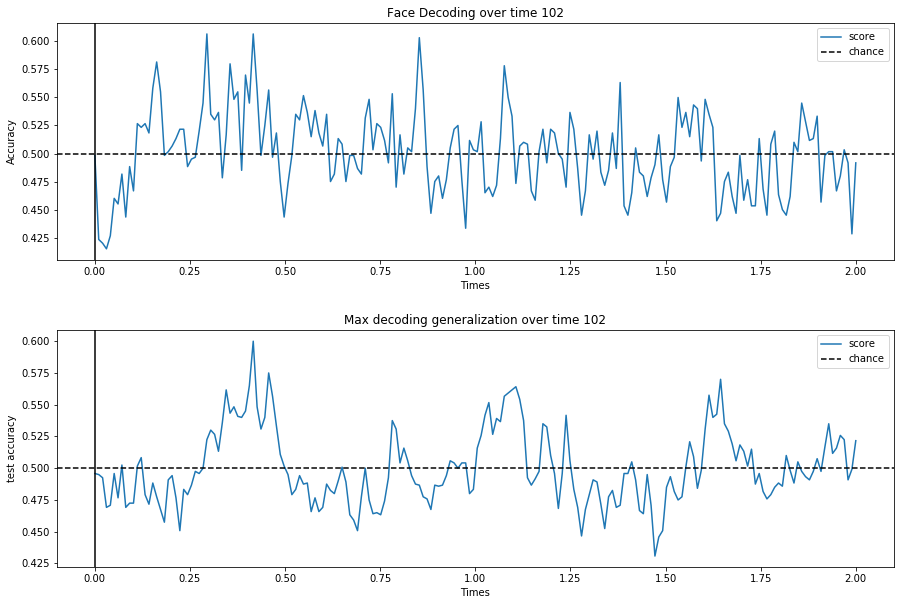

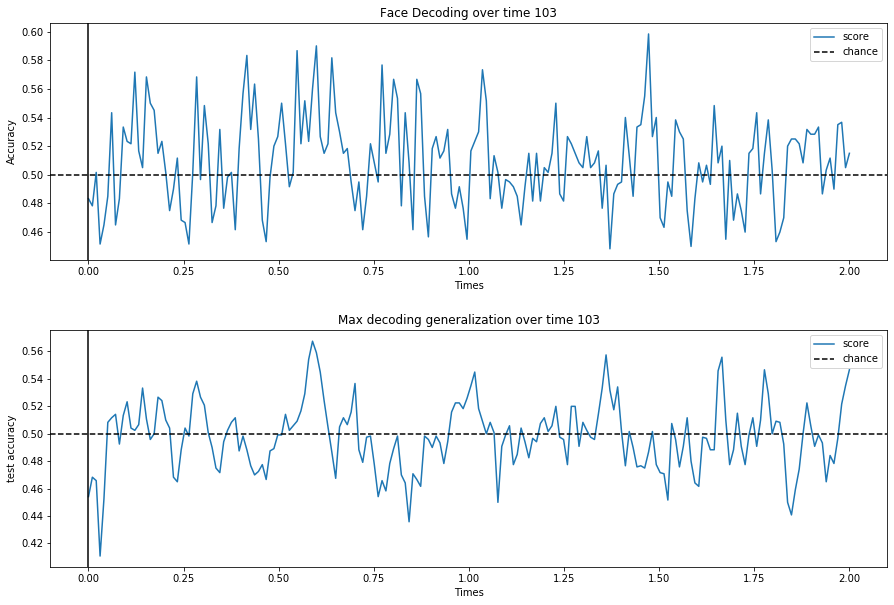

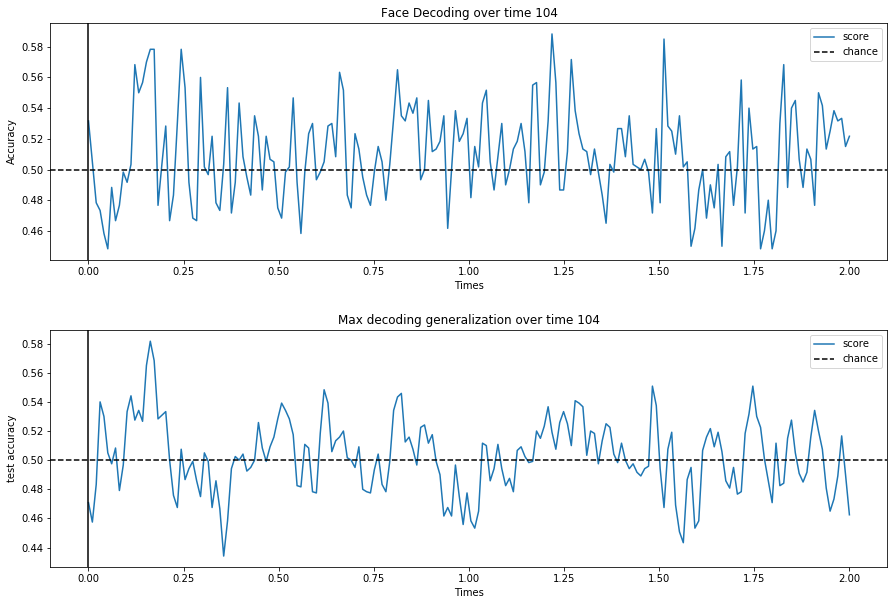

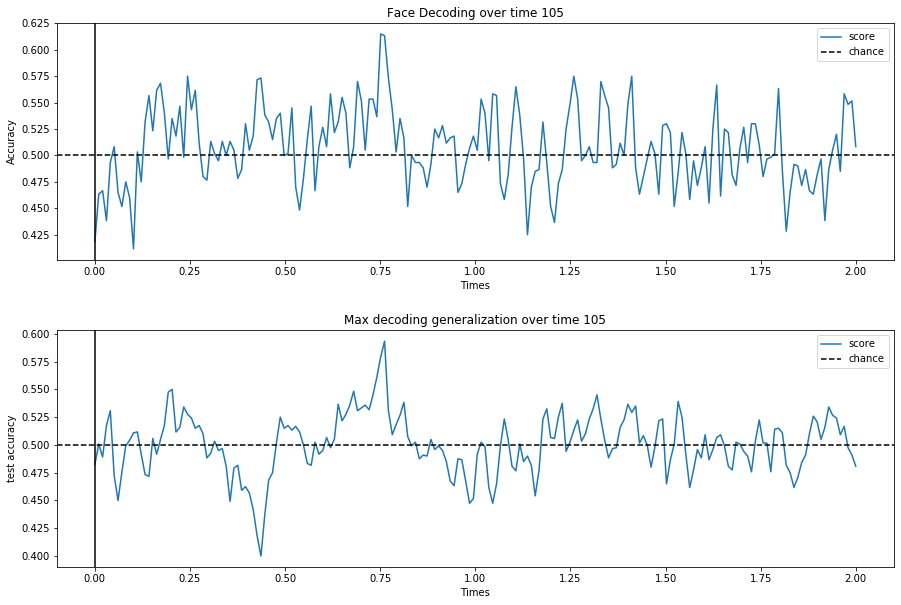

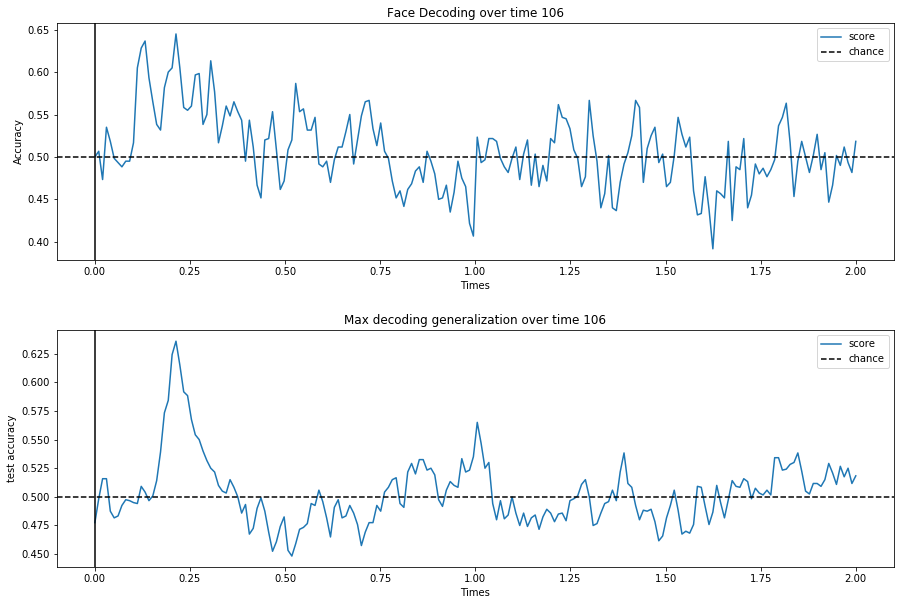

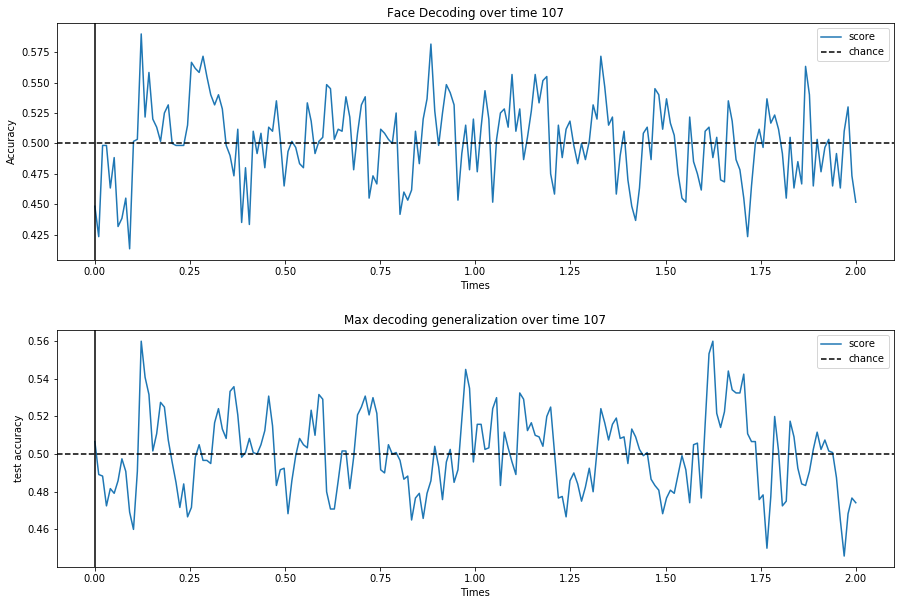

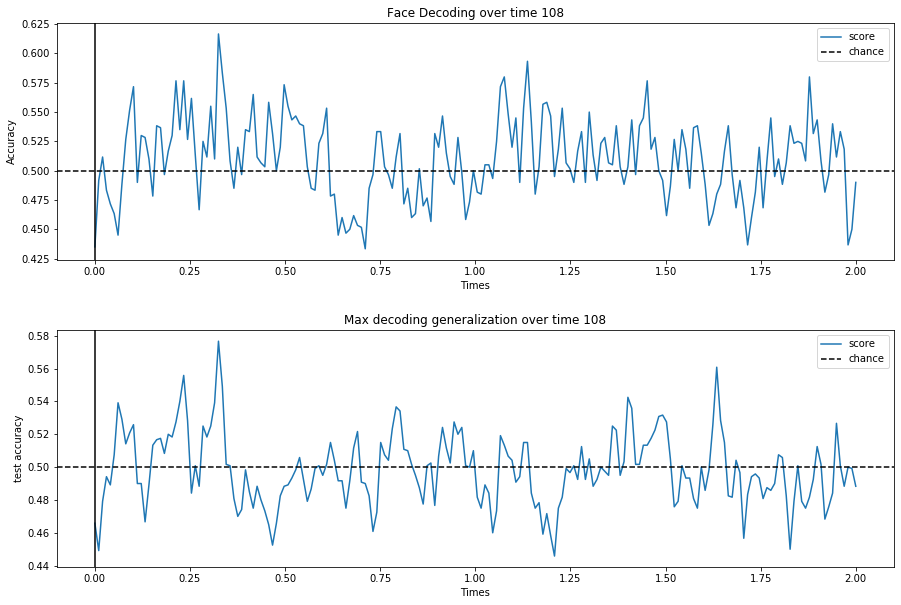

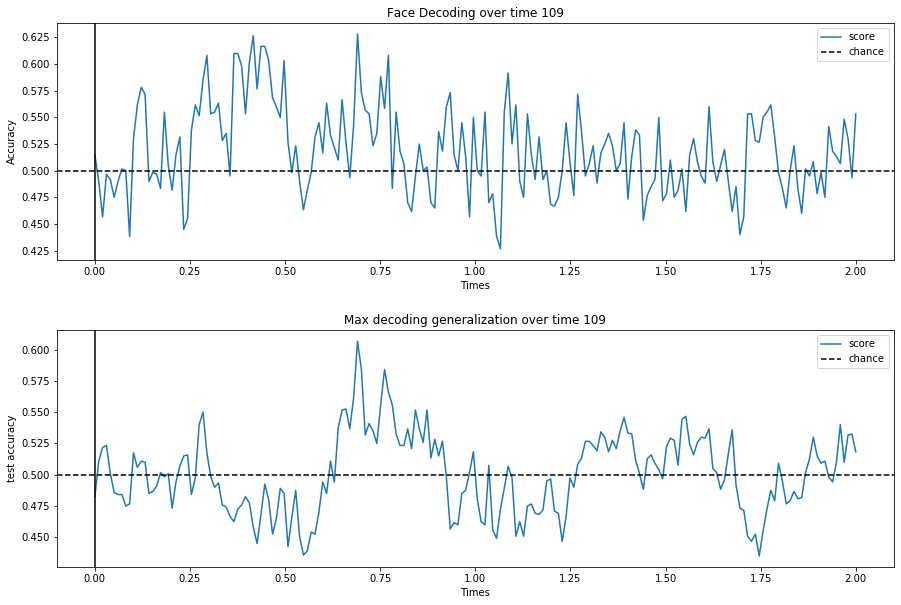

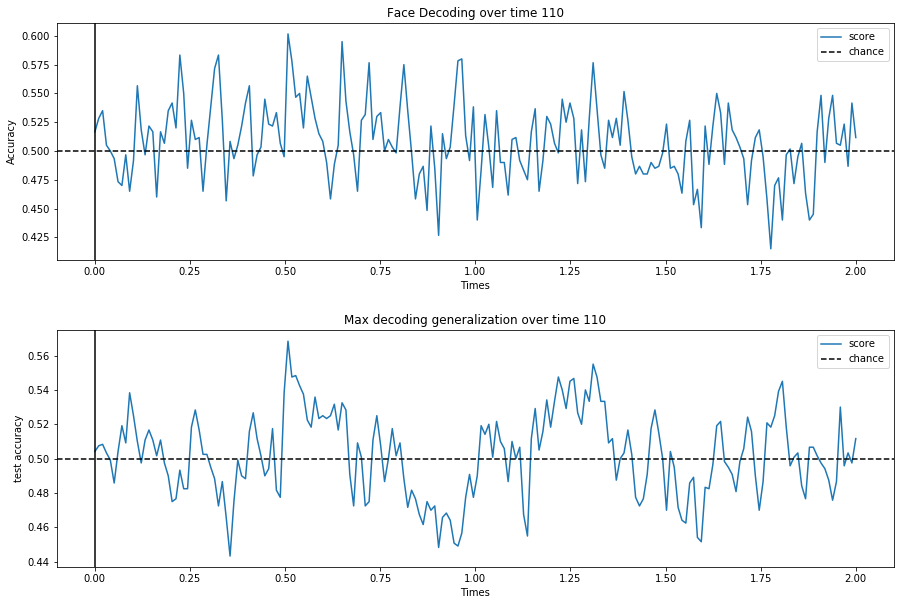

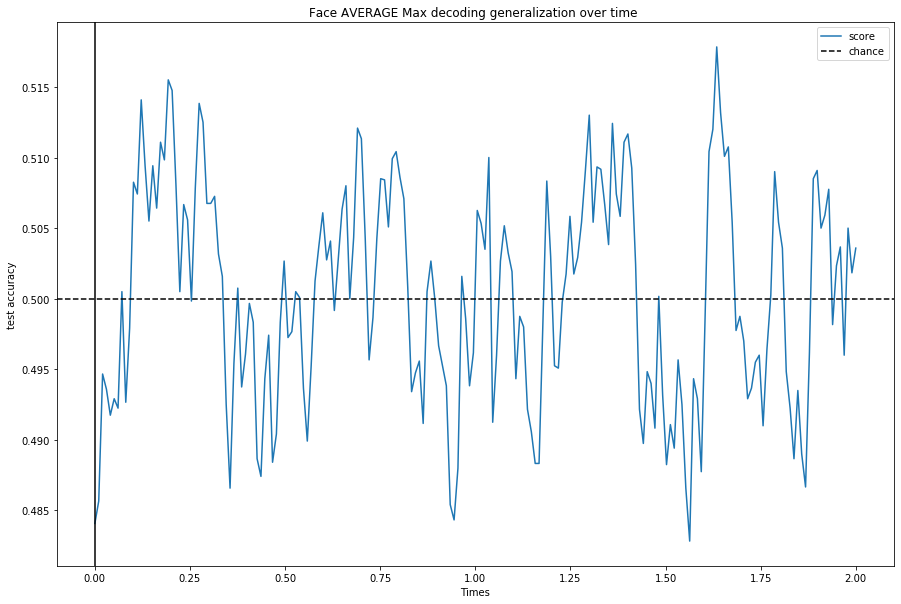

In [14]:
subjects = [str(s) for s in range(101,111)]
test_acc_all = np.full((len(subjects),198),np.nan)
ctype = 'binary'
cond = 'Face'
for s, subj in enumerate(subjects):
    test_acc,time = temp_gen_of_max_accuracy_window(subj,cond,ctype,1)
    test_acc_all[s,:] = test_acc
    
test_acc_avg = test_acc_all.mean(axis = 0)
fig, ax = plt.subplots()
ax.plot(time, test_acc_avg, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('test accuracy')
ax.legend(loc = 'upper right')
ax.axvline(.0, color='k', linestyle='-')
ax.set_title(cond+' AVERAGE Max decoding generalization over time ')
fig.set_figheight(10)
fig.set_figwidth(15)

savefile = os.path.join('GroupFigures','Temporal Generalization','maxGeneralization'+cond+'_'+ctype)
plt.savefig(savefile)

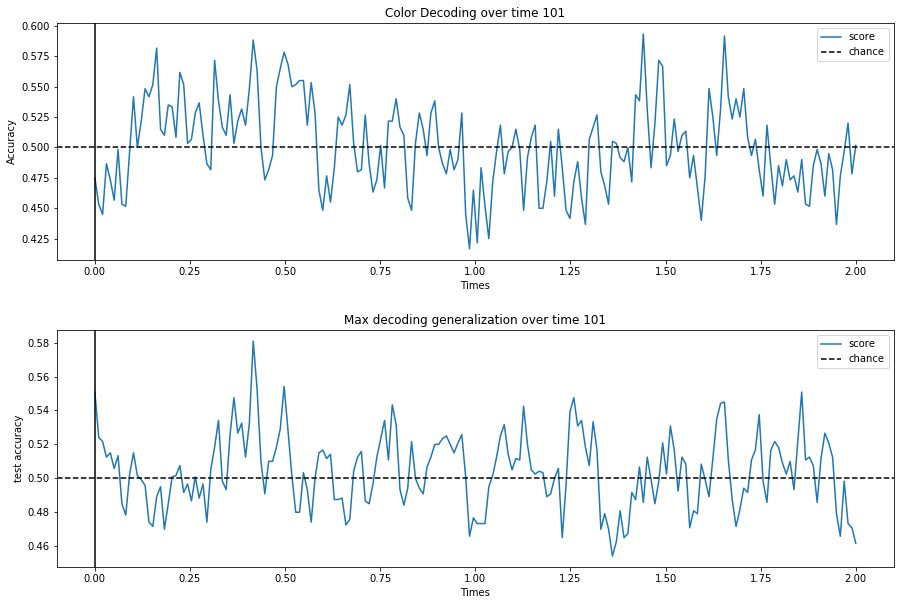

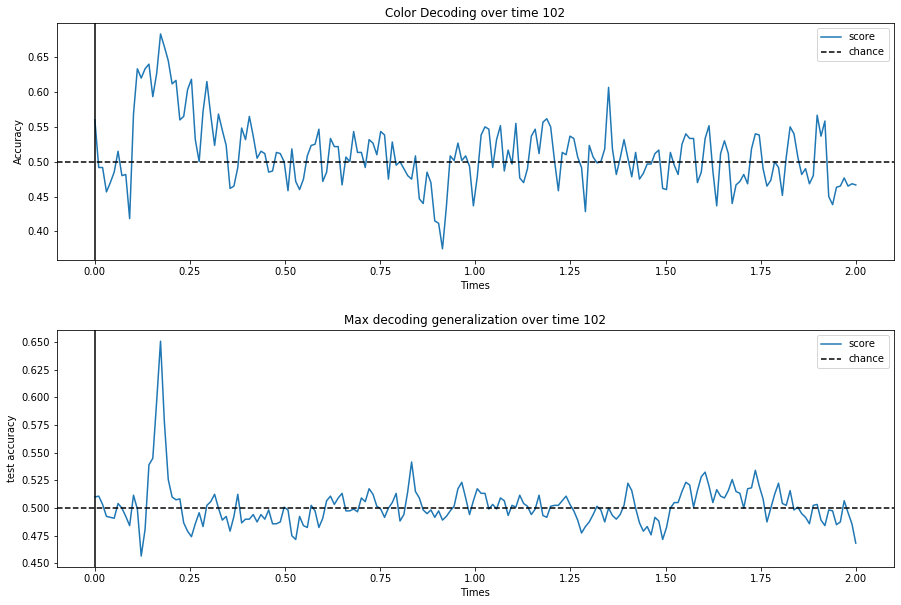

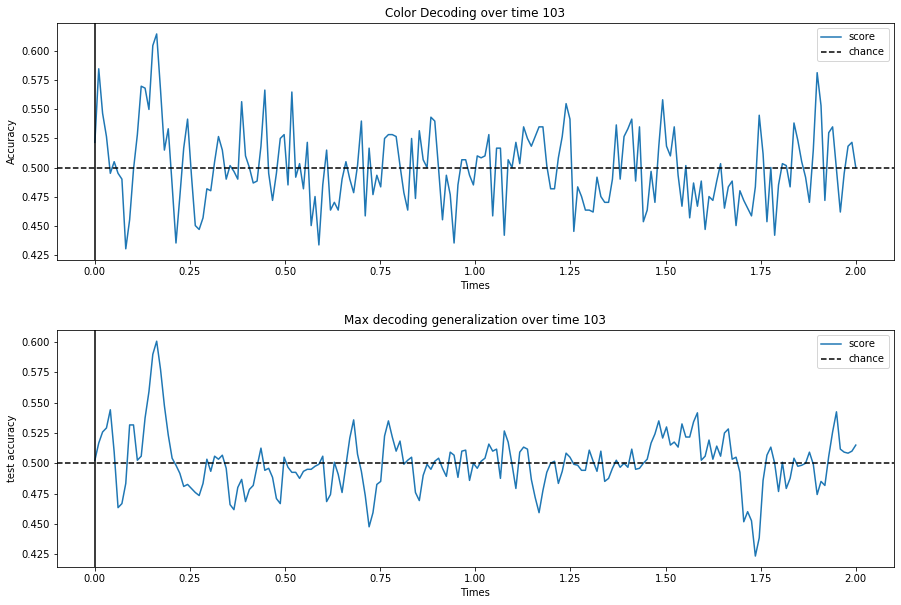

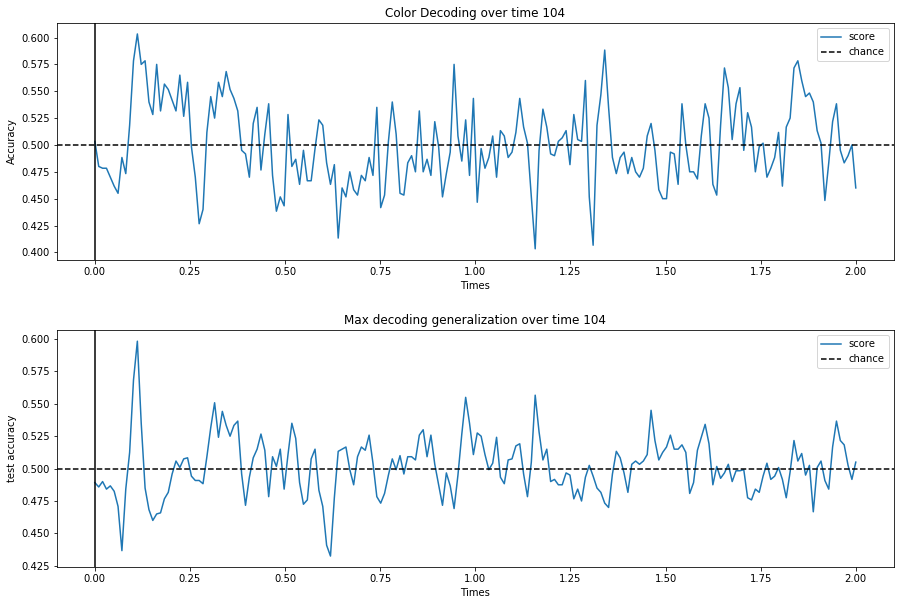

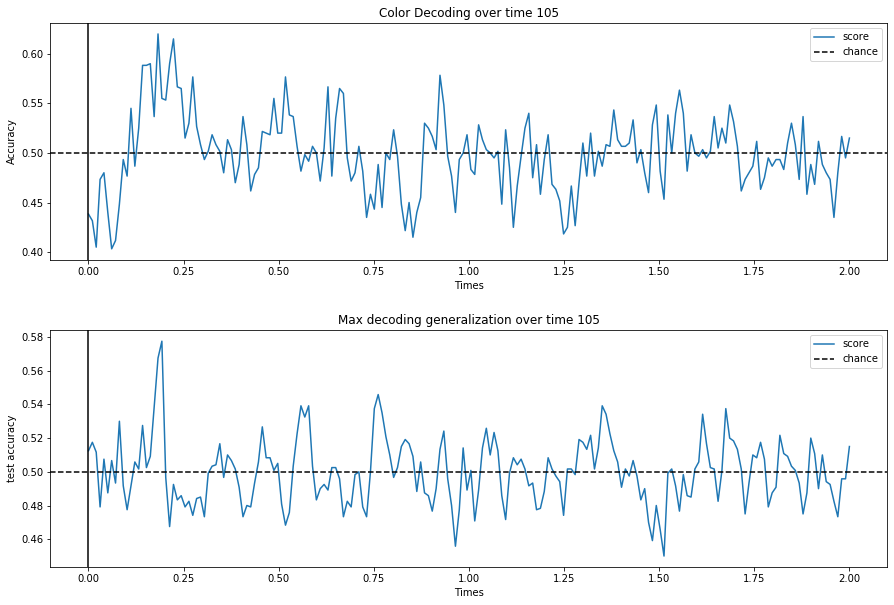

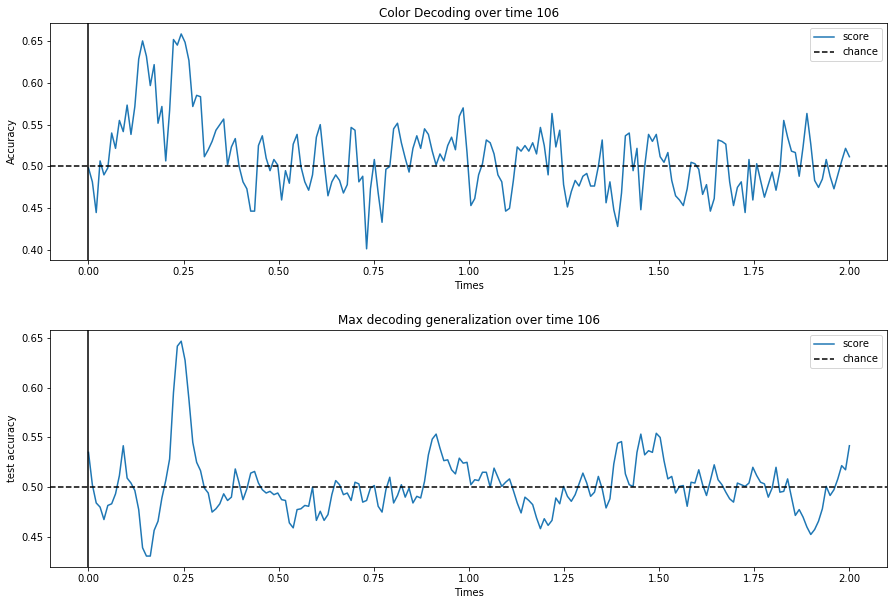

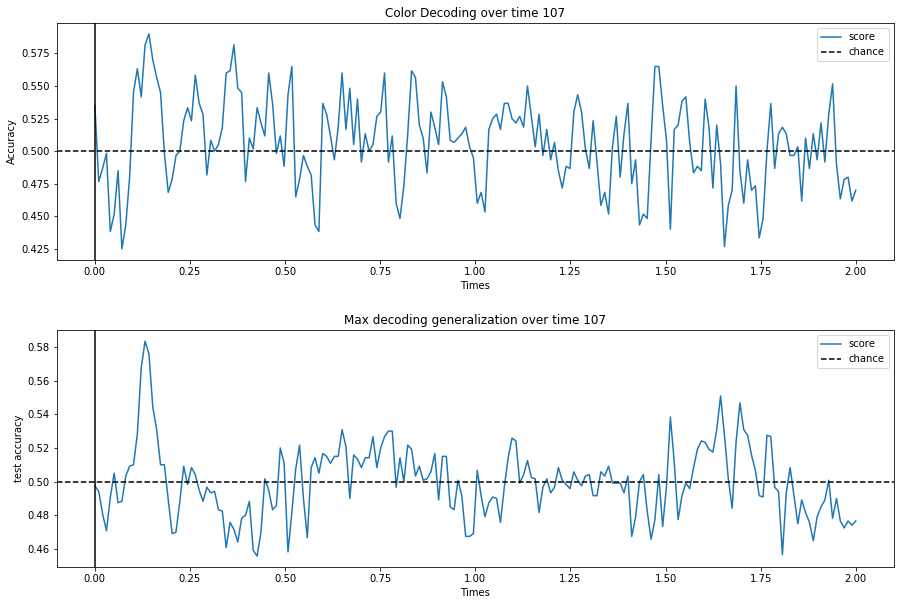

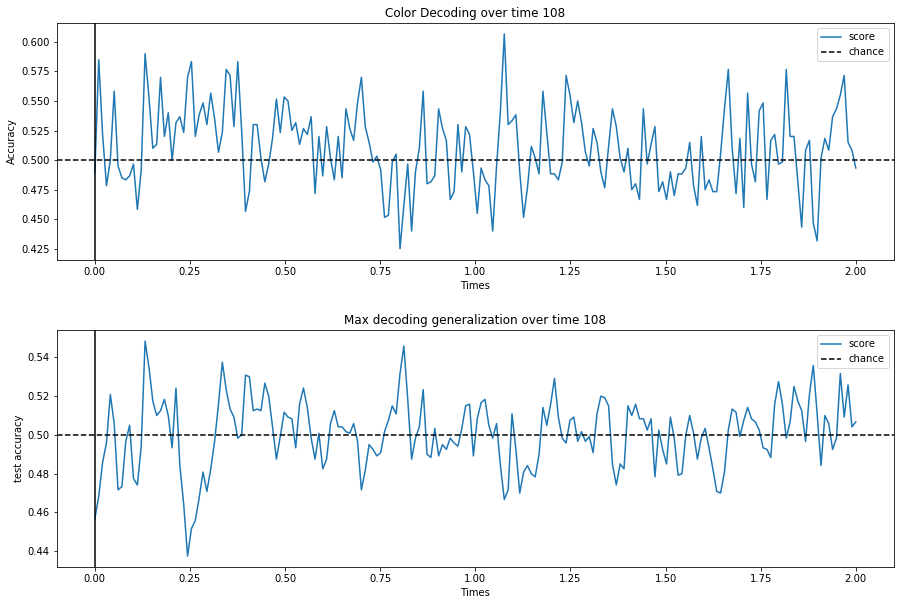

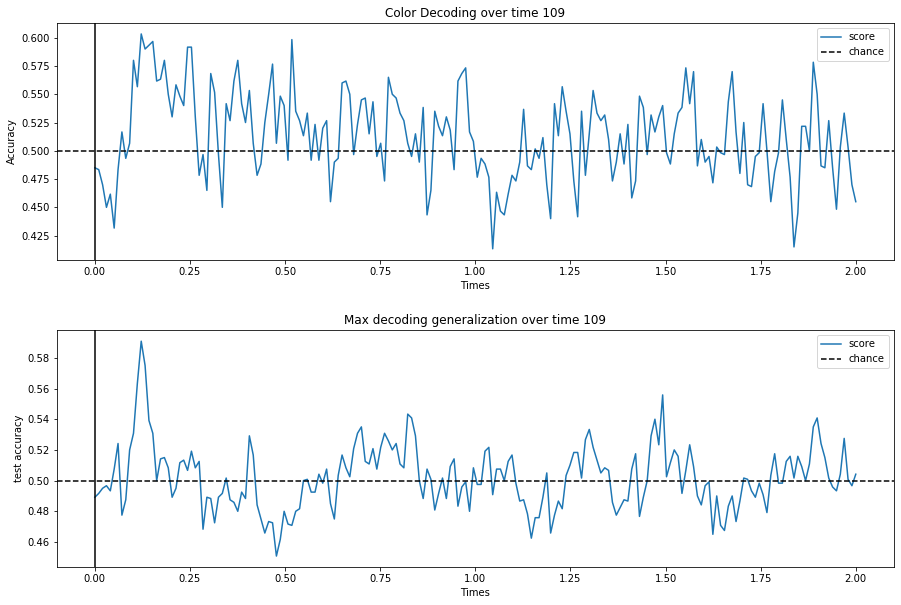

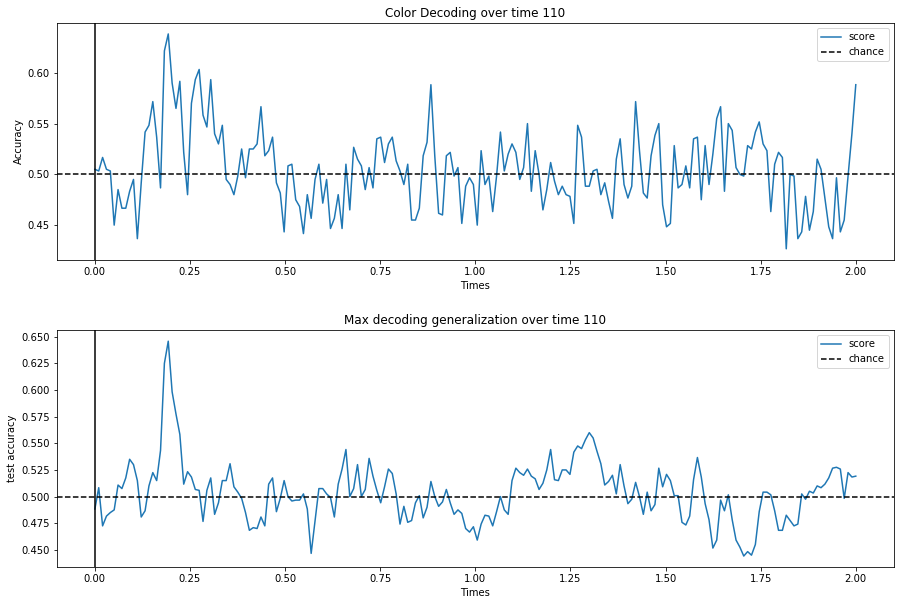

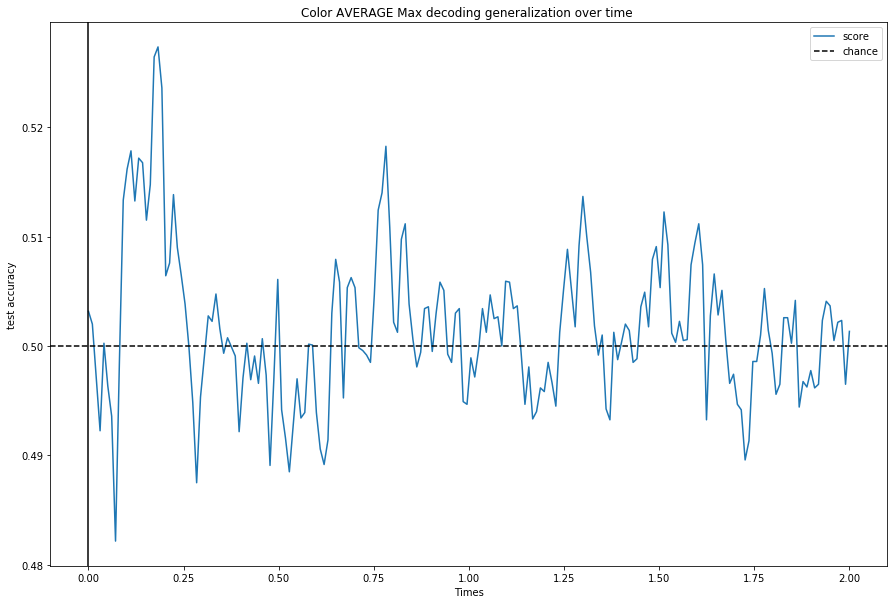

In [15]:
subjects = [str(s) for s in range(101,111)]
test_acc_all = np.full((len(subjects),198),np.nan)
ctype = 'binary'
cond = 'Color'
for s, subj in enumerate(subjects):
    test_acc,time = temp_gen_of_max_accuracy_window(subj,cond,ctype,1)
    test_acc_all[s,:] = test_acc
    
test_acc_avg = test_acc_all.mean(axis = 0)
fig, ax = plt.subplots()
ax.plot(time, test_acc_avg, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('test accuracy')
ax.legend(loc = 'upper right')
ax.axvline(.0, color='k', linestyle='-')
ax.set_title(cond+' AVERAGE Max decoding generalization over time ')
fig.set_figheight(10)
fig.set_figwidth(15)

savefile = os.path.join('GroupFigures','Temporal Generalization','maxGeneralization'+cond+'_'+ctype)
plt.savefig(savefile)

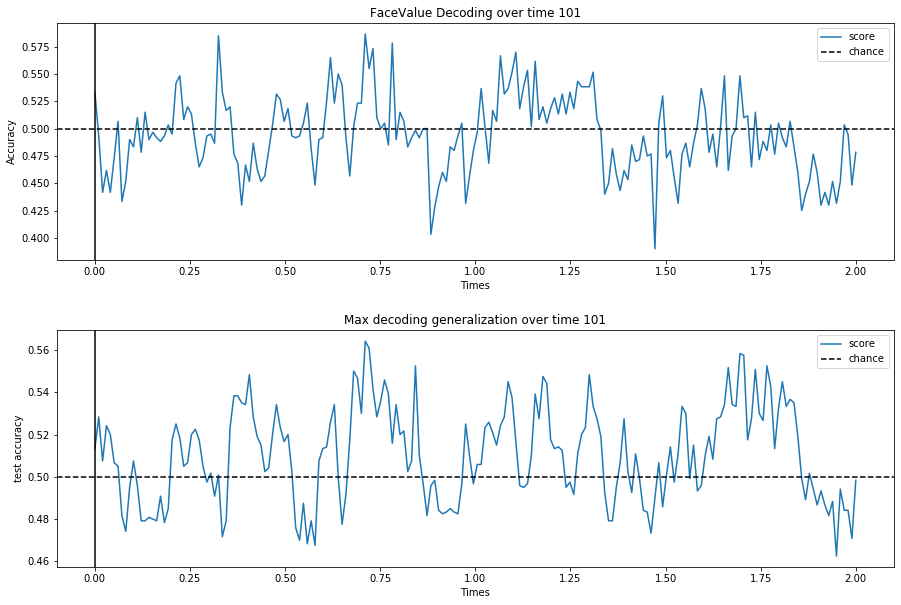

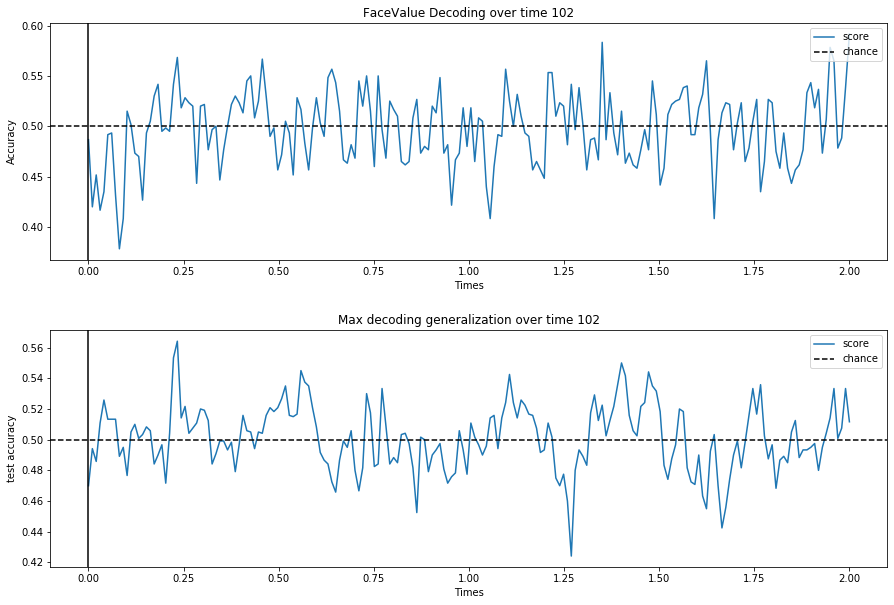

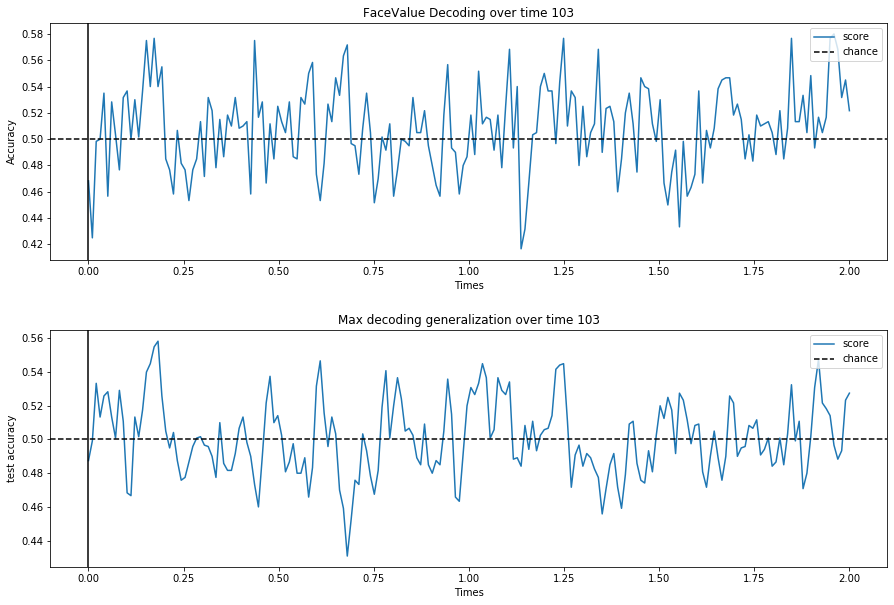

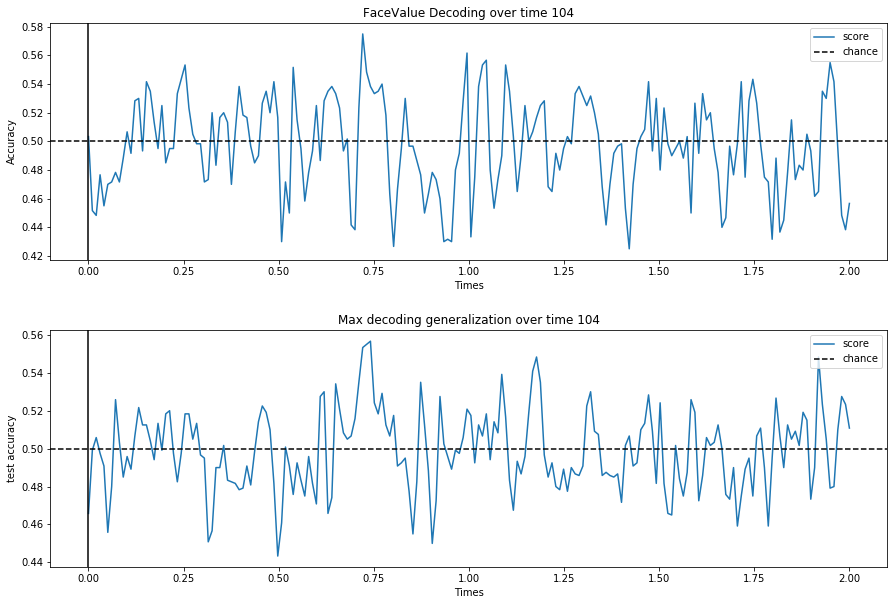

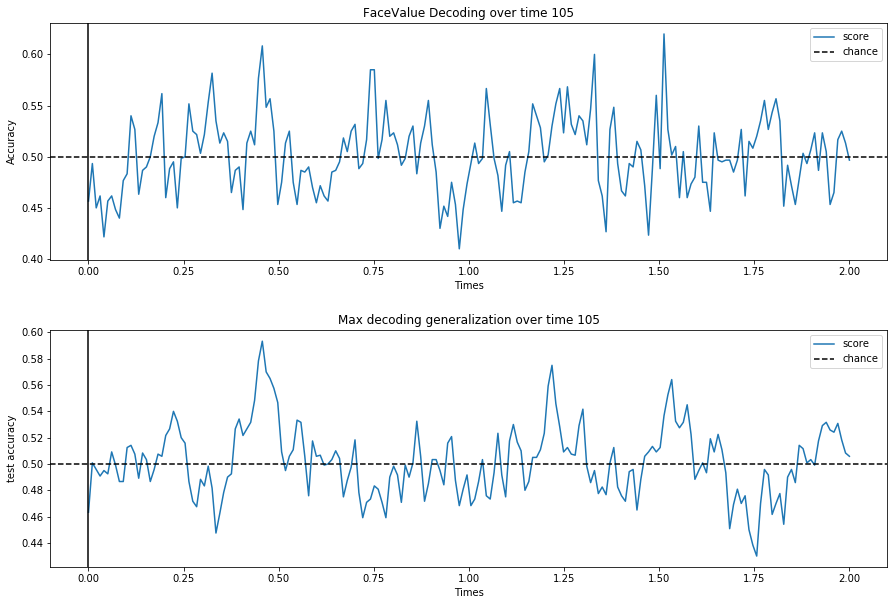

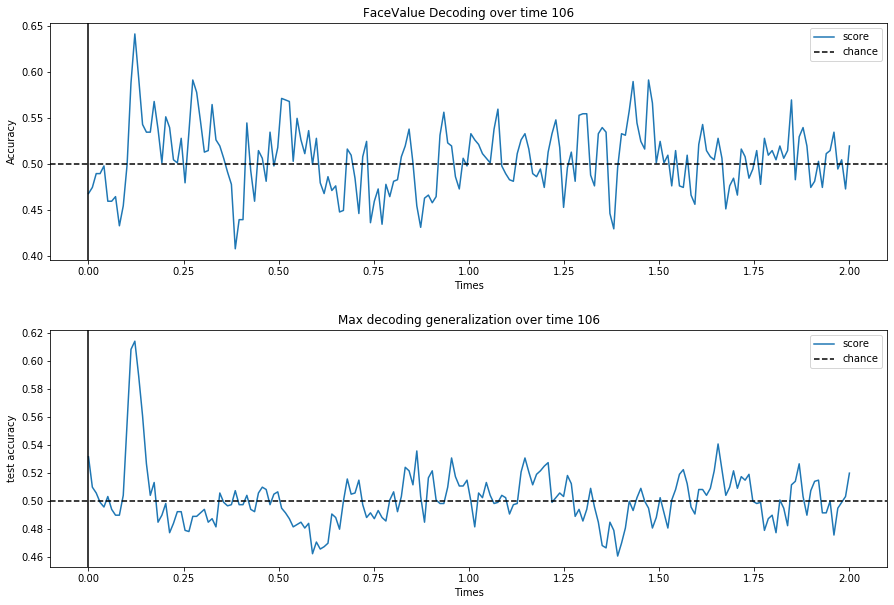

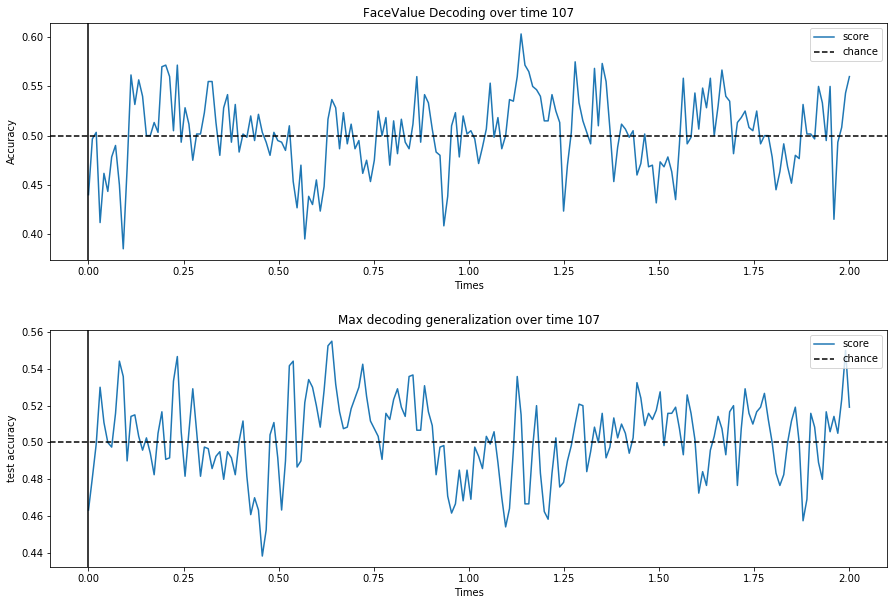

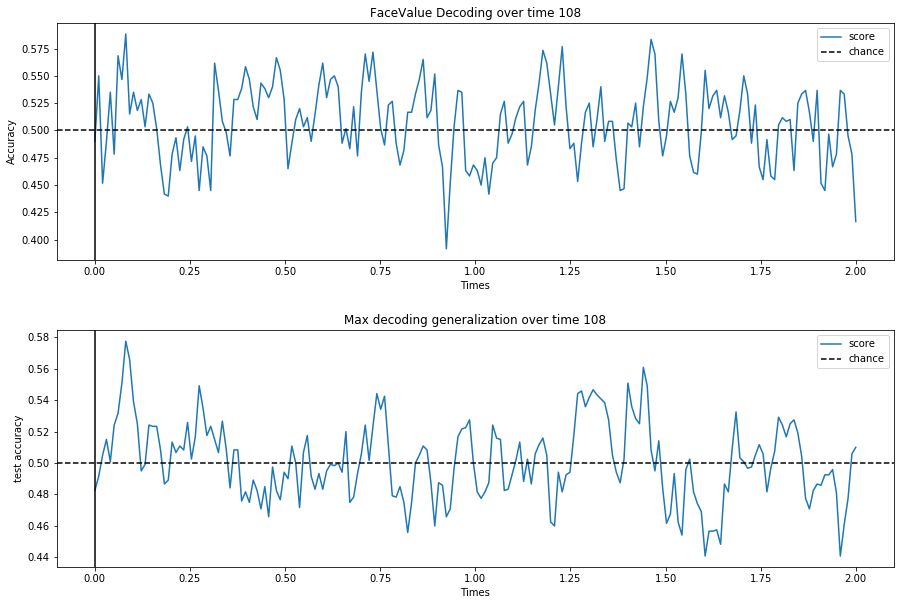

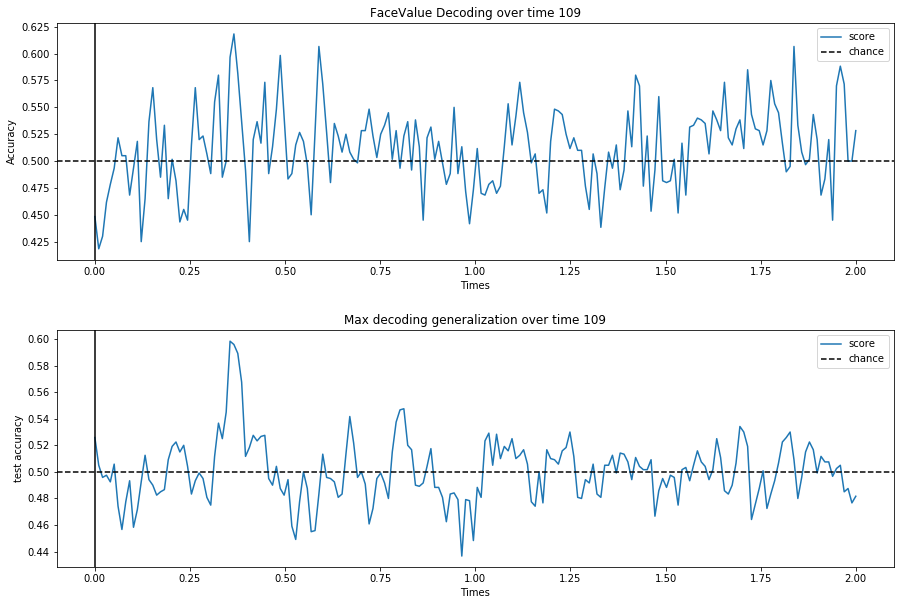

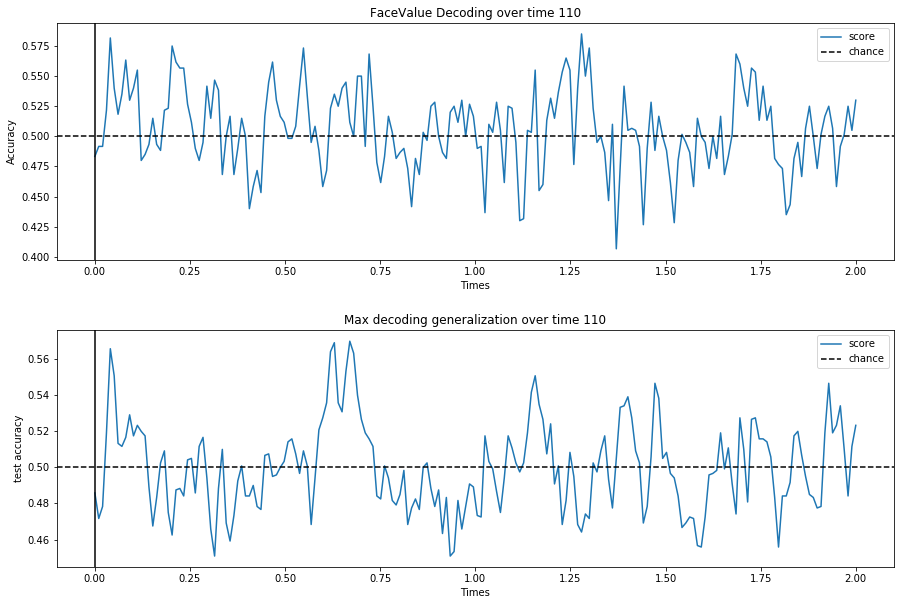

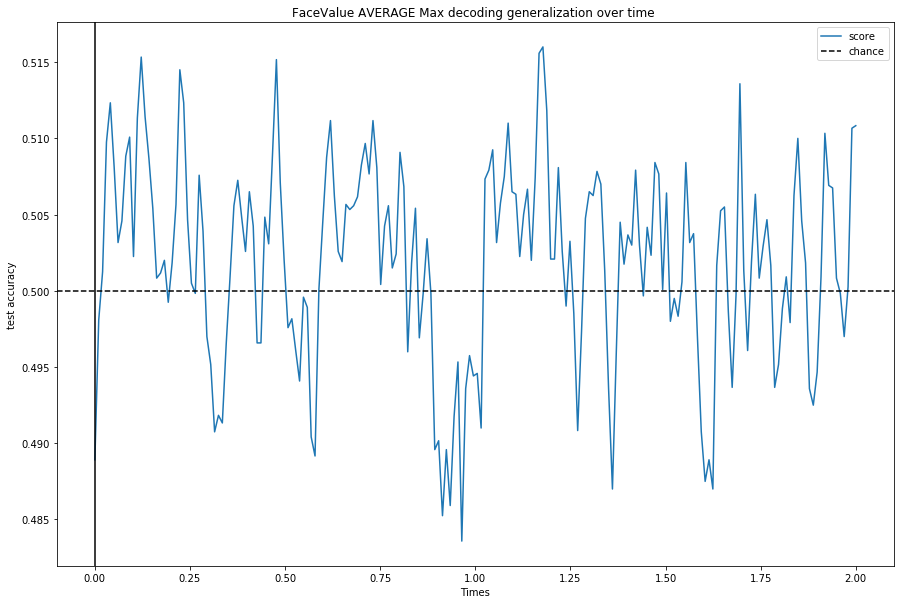

In [16]:
subjects = [str(s) for s in range(101,111)]
test_acc_all = np.full((len(subjects),198),np.nan)
ctype = 'binary'
cond = 'FaceValue'
for s, subj in enumerate(subjects):
    test_acc,time = temp_gen_of_max_accuracy_window(subj,cond,ctype,1)
    test_acc_all[s,:] = test_acc
    
test_acc_avg = test_acc_all.mean(axis = 0)
fig, ax = plt.subplots()
ax.plot(time, test_acc_avg, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('test accuracy')
ax.legend(loc = 'upper right')
ax.axvline(.0, color='k', linestyle='-')
ax.set_title(cond+' AVERAGE Max decoding generalization over time ')
fig.set_figheight(10)
fig.set_figwidth(15)

savefile = os.path.join('GroupFigures','Temporal Generalization','maxGeneralization'+cond+'_'+ctype)
plt.savefig(savefile)

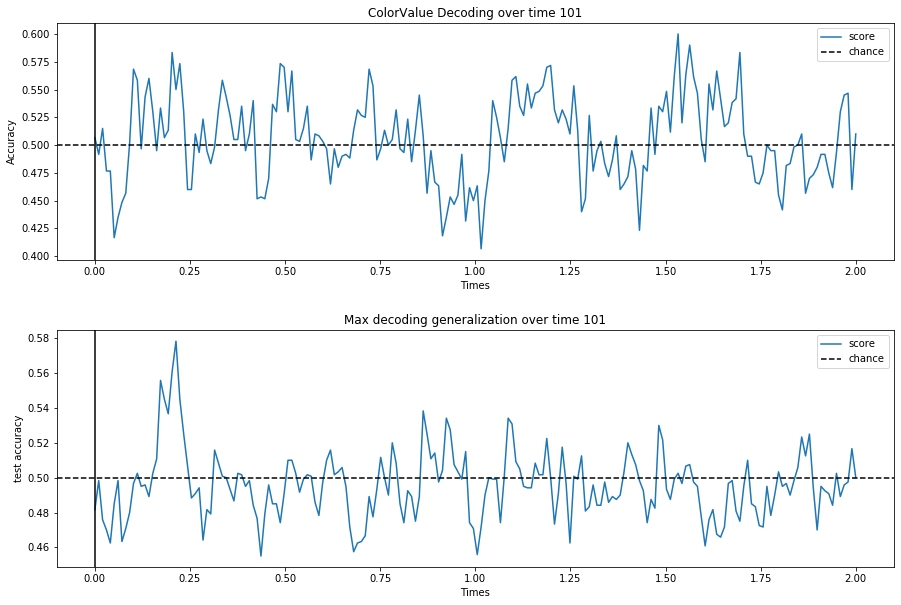

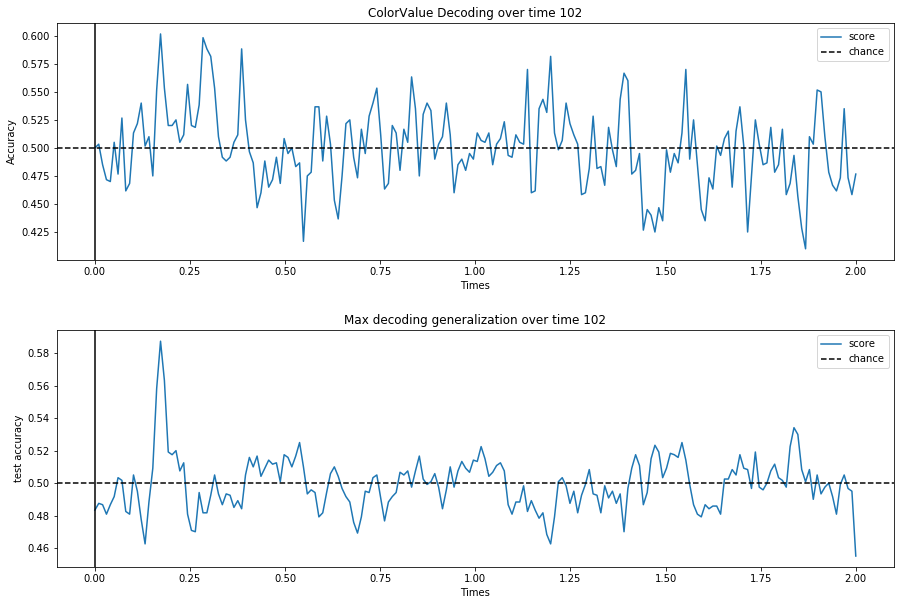

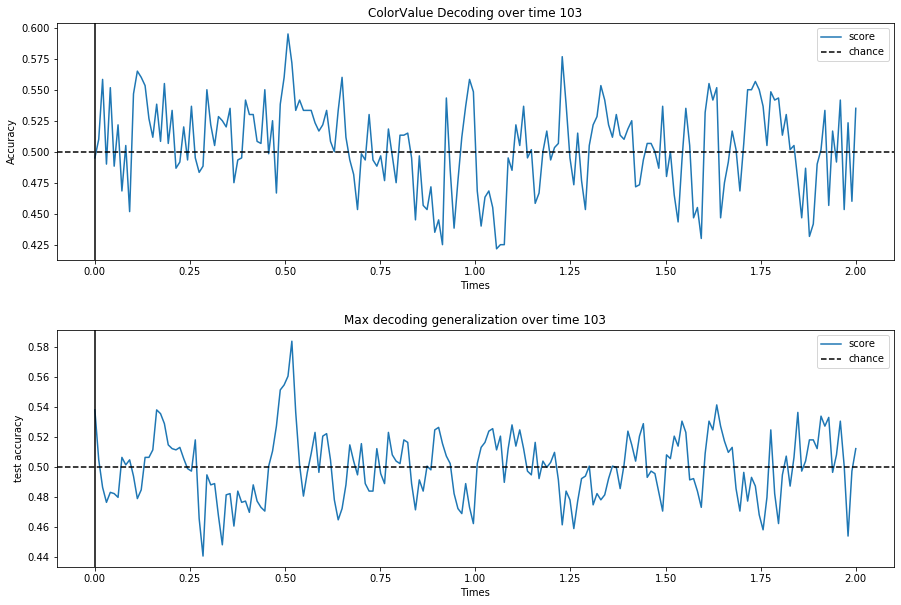

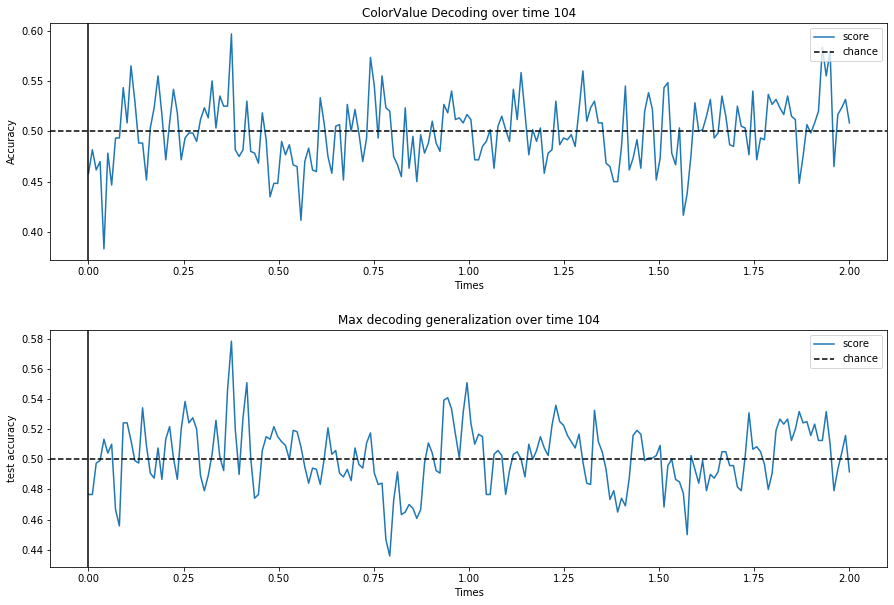

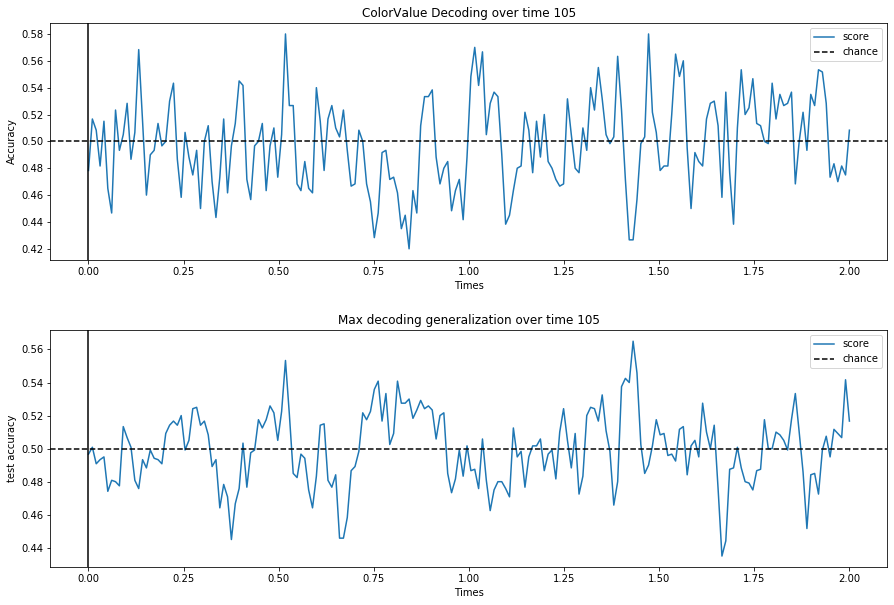

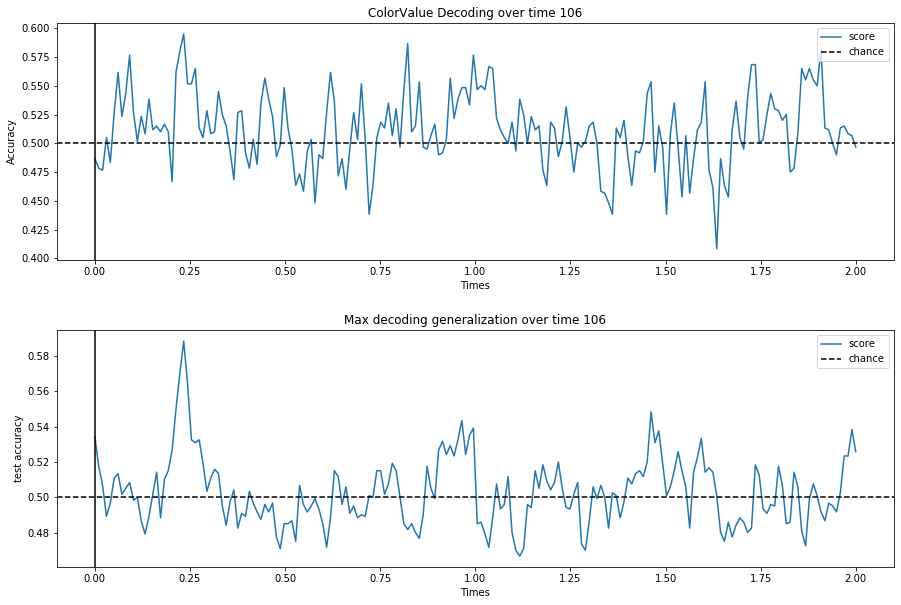

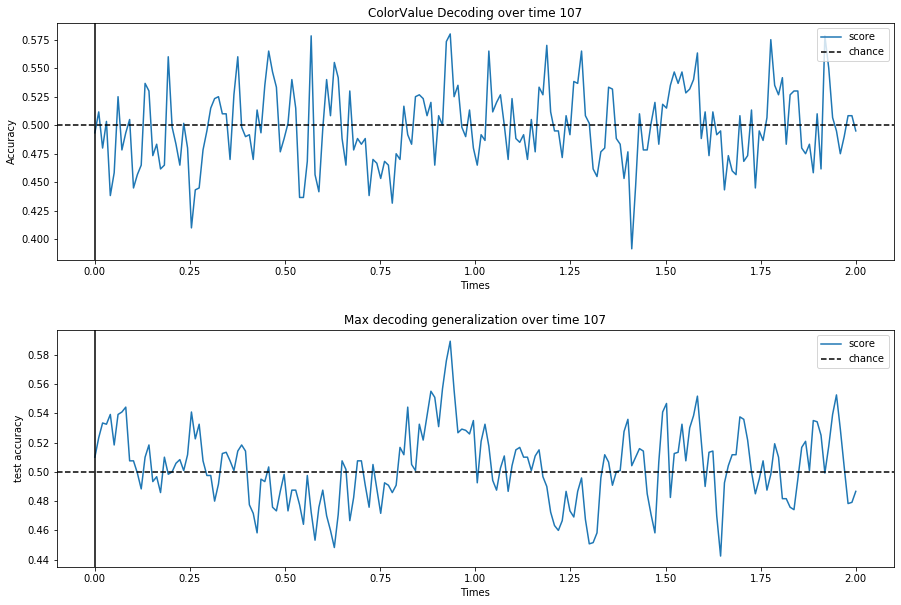

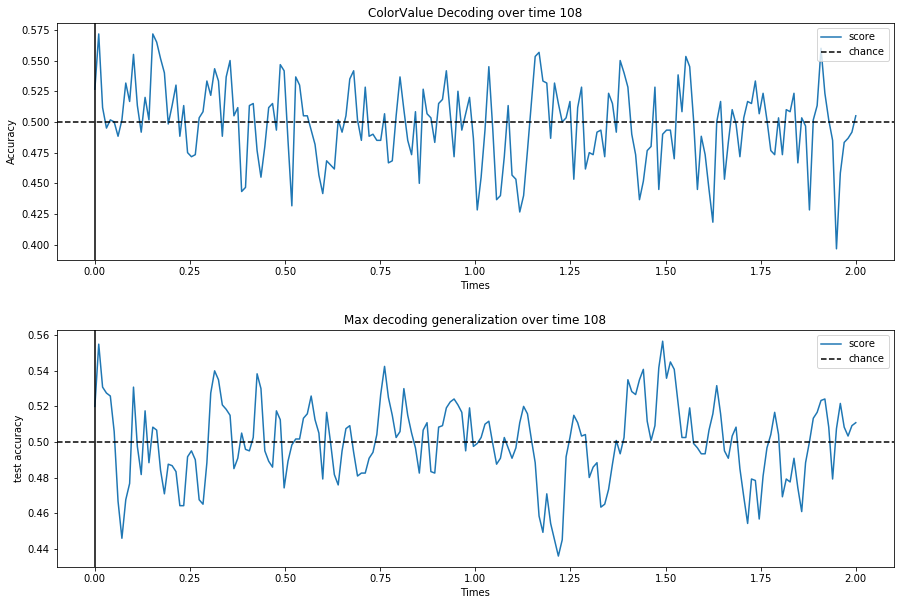

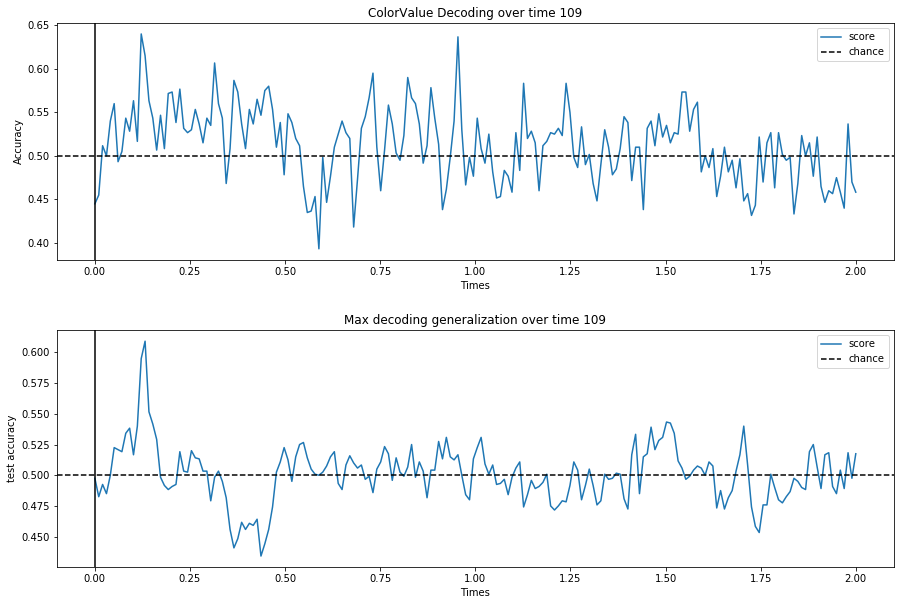

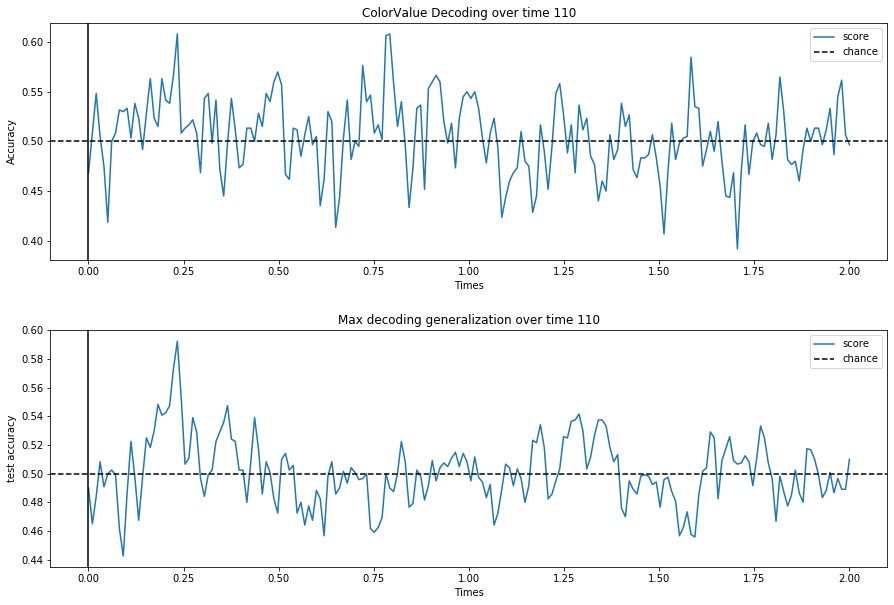

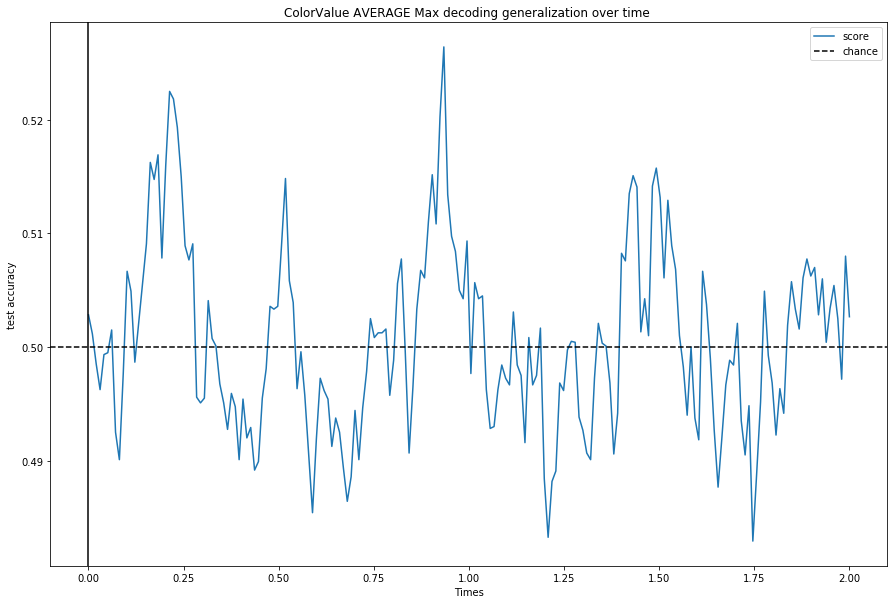

In [17]:
subjects = [str(s) for s in range(101,111)]
test_acc_all = np.full((len(subjects),198),np.nan)
ctype = 'binary'
cond = 'ColorValue'
for s, subj in enumerate(subjects):
    test_acc,time = temp_gen_of_max_accuracy_window(subj,cond,ctype,1)
    test_acc_all[s,:] = test_acc
    
test_acc_avg = test_acc_all.mean(axis = 0)
fig, ax = plt.subplots()
ax.plot(time, test_acc_avg, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('test accuracy')
ax.legend(loc = 'upper right')
ax.axvline(.0, color='k', linestyle='-')
ax.set_title(cond+' AVERAGE Max decoding generalization over time ')
fig.set_figheight(10)
fig.set_figwidth(15)

savefile = os.path.join('GroupFigures','Temporal Generalization','maxGeneralization'+cond+'_'+ctype)
plt.savefig(savefile)

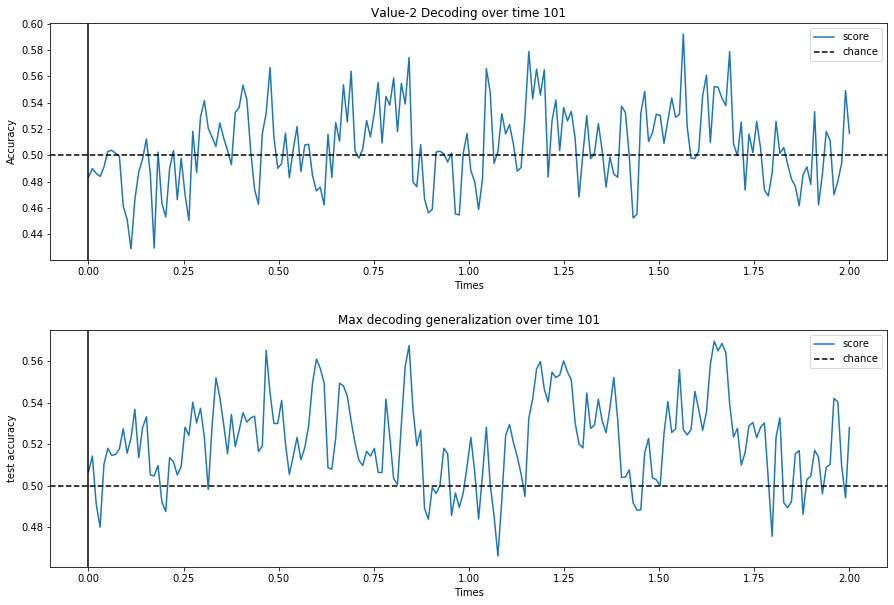

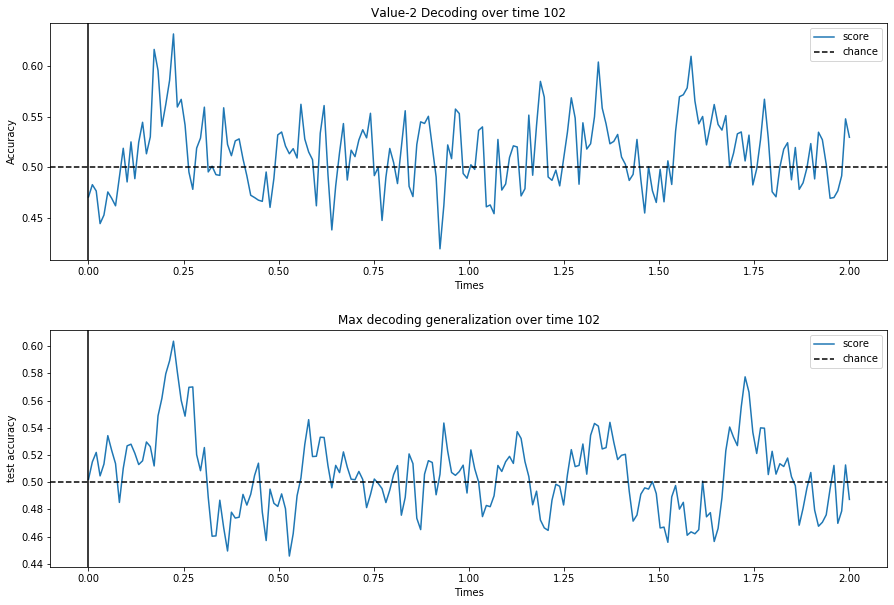

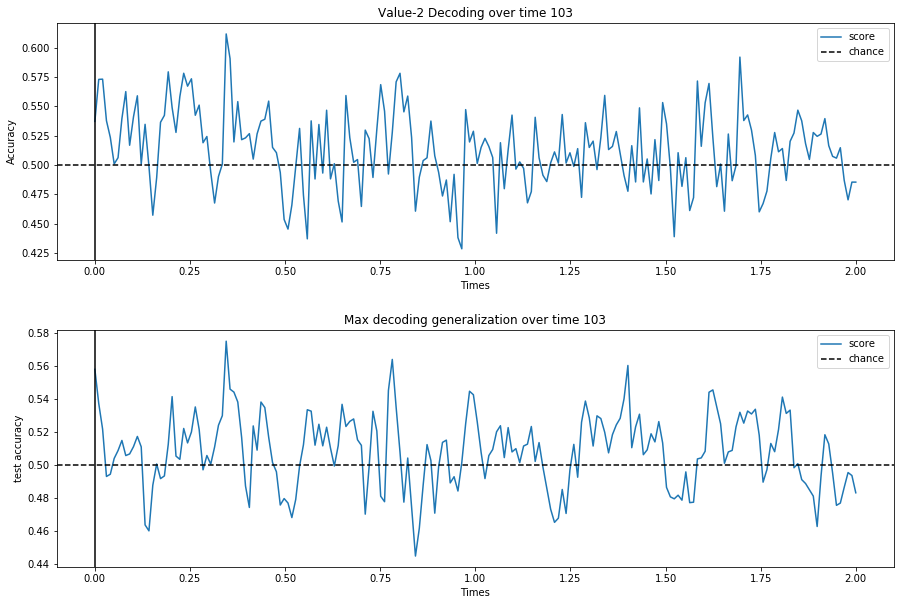

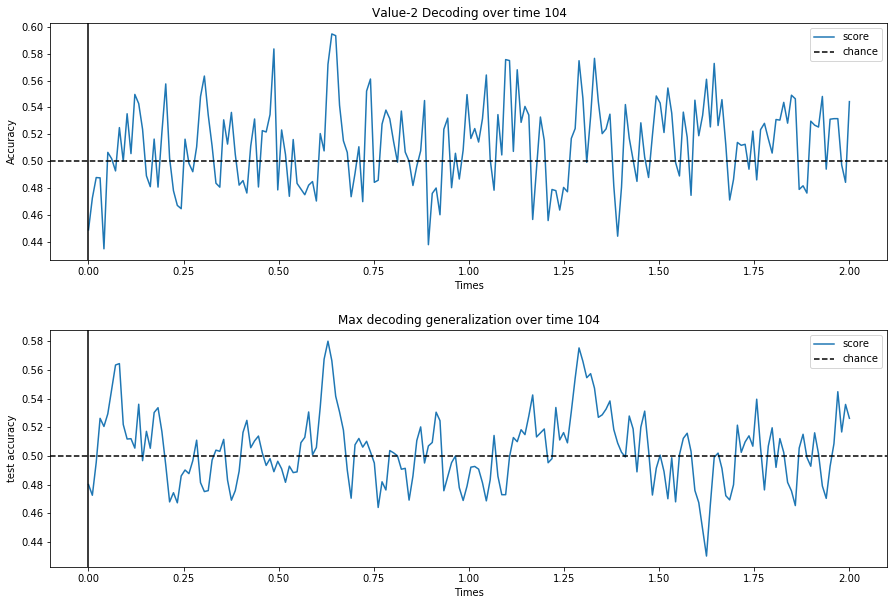

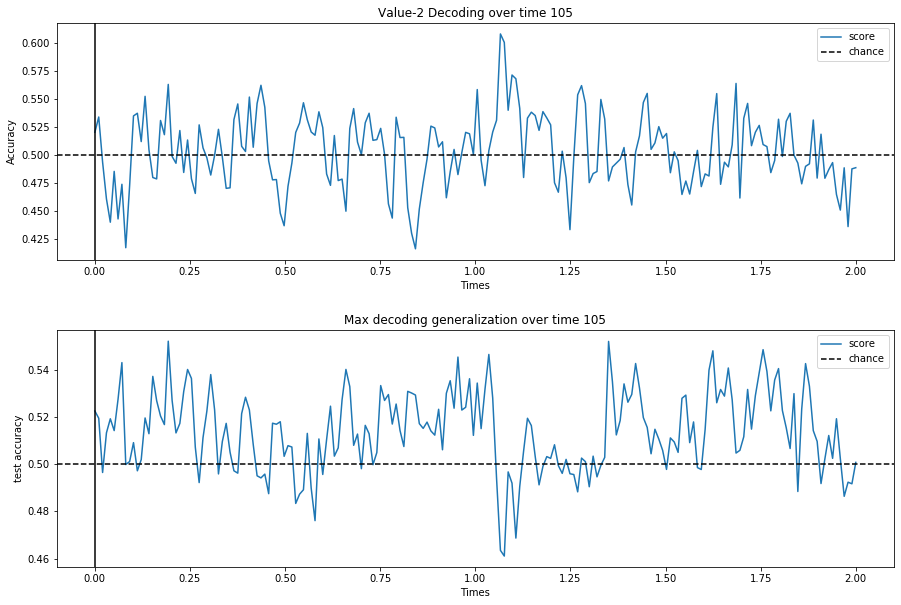

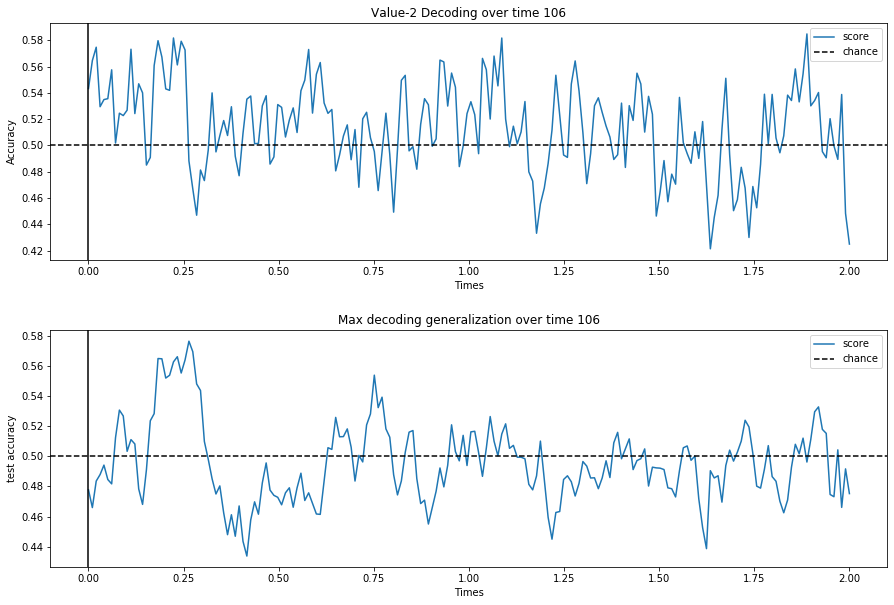

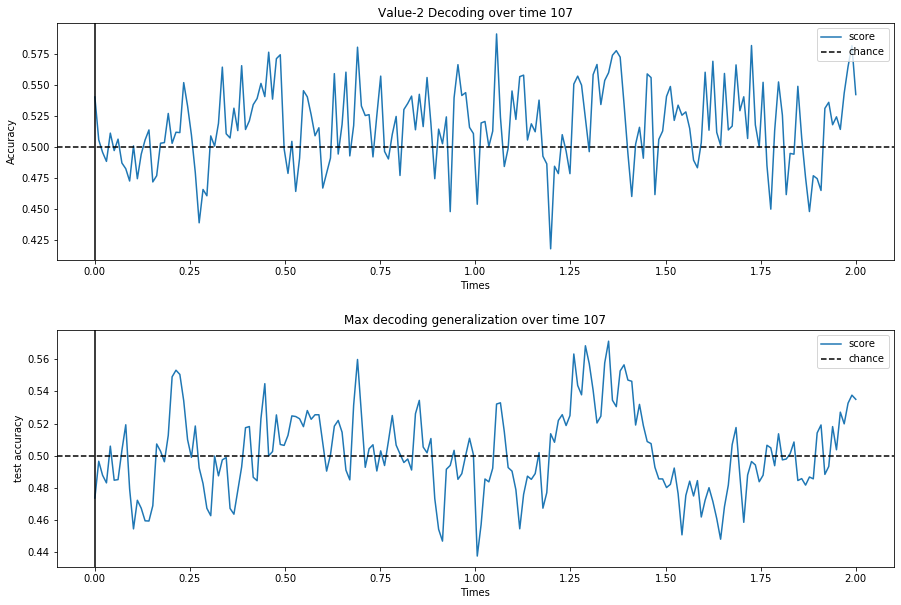

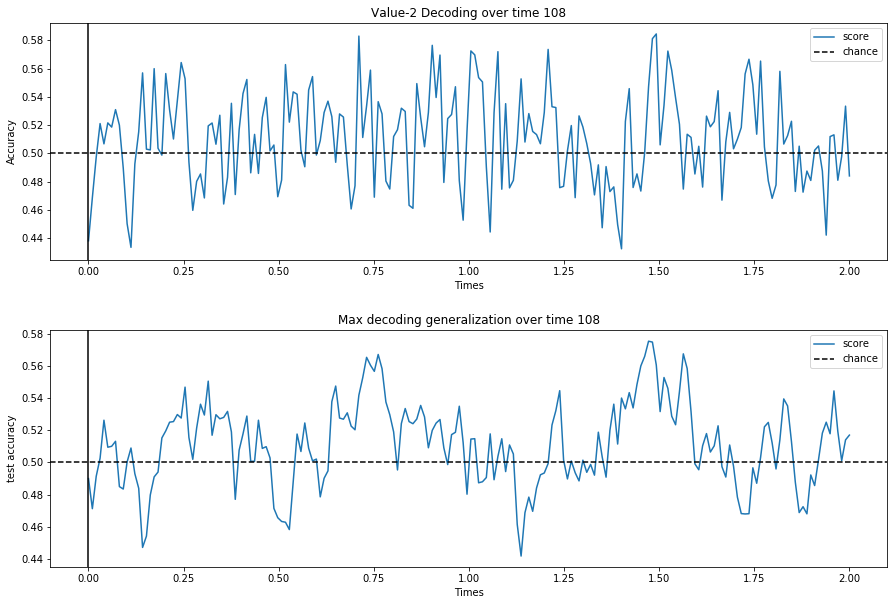

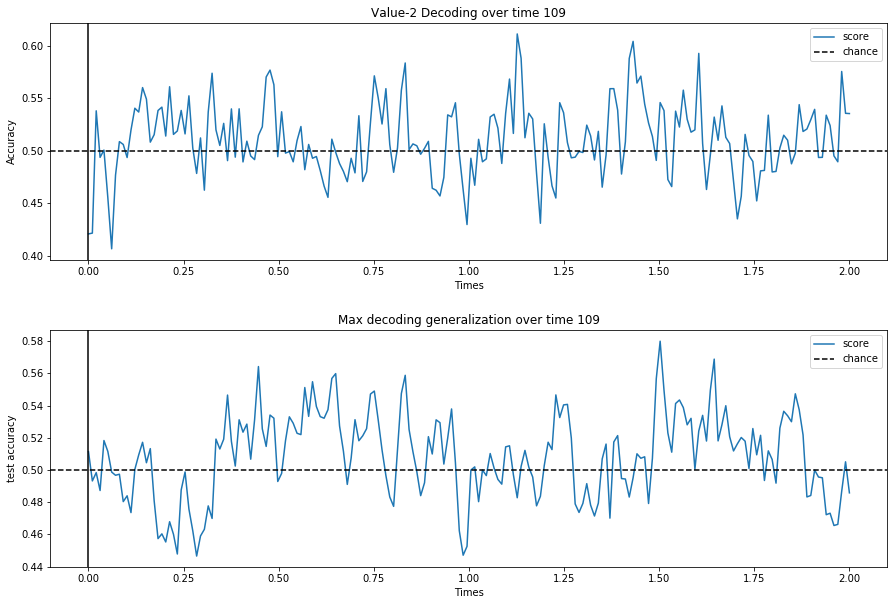

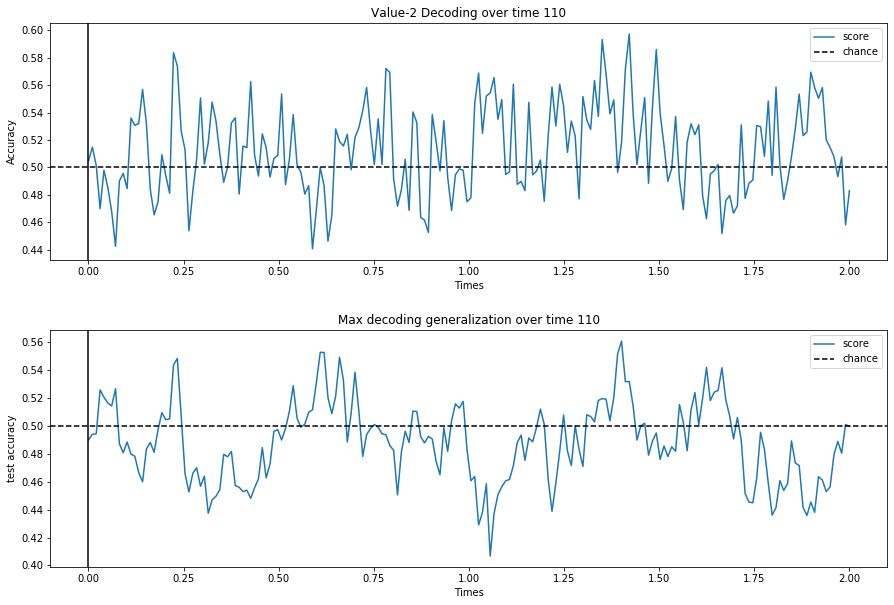

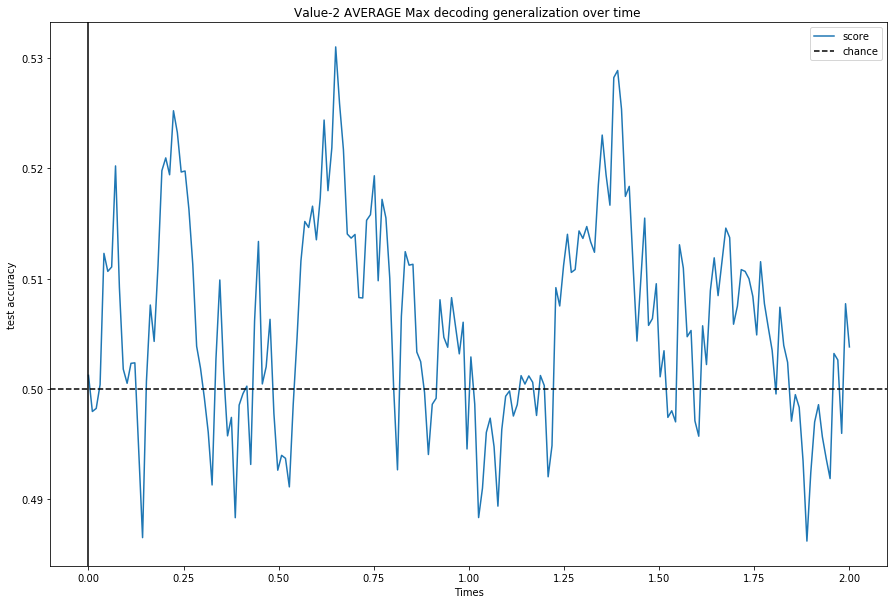

In [18]:
subjects = [str(s) for s in range(101,111)]
test_acc_all = np.full((len(subjects),198),np.nan)
ctype = 'binary'
cond = 'Value-2'
for s, subj in enumerate(subjects):
    test_acc,time = temp_gen_of_max_accuracy_window(subj,cond,ctype,1)
    test_acc_all[s,:] = test_acc
    
test_acc_avg = test_acc_all.mean(axis = 0)
fig, ax = plt.subplots()
ax.plot(time, test_acc_avg, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('test accuracy')
ax.legend(loc = 'upper right')
ax.axvline(.0, color='k', linestyle='-')
ax.set_title(cond+' AVERAGE Max decoding generalization over time ')
fig.set_figheight(10)
fig.set_figwidth(15)

savefile = os.path.join('GroupFigures','Temporal Generalization','maxGeneralization'+cond+'_'+ctype)
plt.savefig(savefile)